In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Adam
from keras import regularizers
import numpy as np

Using TensorFlow backend.


In [2]:
max_features = 10000 
maxlen = 500 
batch_size = 32

In [3]:
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [4]:
print(input_train.shape)
print(input_train[0])

(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [6]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

In [9]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.5711 - acc: 0.6954 - val_loss: 0.4063 - val_acc: 0.8348
Epoch 2/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.3598 - acc: 0.8528 - val_loss: 0.3638 - val_acc: 0.8448
Epoch 3/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.2825 - acc: 0.8891 - val_loss: 0.3999 - val_acc: 0.8166
Epoch 4/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.2380 - acc: 0.9099 - val_loss: 0.4071 - val_acc: 0.8508
Epoch 5/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.1985 - acc: 0.9268 - val_loss: 0.3518 - val_acc: 0.8528
Epoch 6/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.1584 - acc: 0.9432 - val_loss: 0.4364 - val_acc: 0.8442
Epoch 7/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.

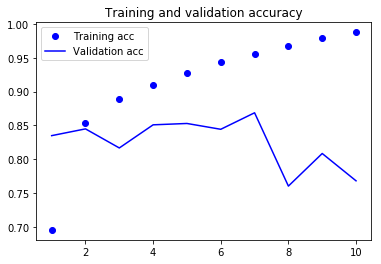

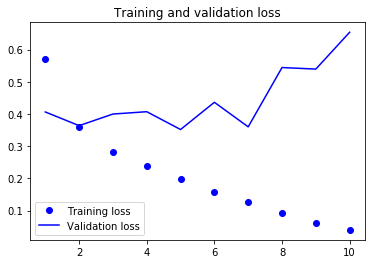

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [11]:
from keras.layers import LSTM

In [ ]:
early_stopping=EarlyStopping(monitor='val_loss', patience=15)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.00001)
checkpoint = ModelCheckpoint('data/weights.lstm.best.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')


model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32, bias_regularizer=regularizers.l2(0.05)))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))

model.compile(optimizer=Adam(lr=0.002),
            loss='binary_crossentropy',
            metrics=['acc'])
history = model.fit(input_train, y_train,
            epochs=100,
            batch_size=128,
            validation_split=0.2,
            callbacks=[early_stopping, reduce_lr, checkpoint])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 74s 4ms/step - loss: 1.7044 - acc: 0.7480 - val_loss: 1.2262 - val_acc: 0.8330

Epoch 00001: val_acc improved from -inf to 0.83300, saving model to data/weights.lstm.best.hdf5
Epoch 2/100
20000/20000 [==============================] - 77s 4ms/step - loss: 0.8919 - acc: 0.8821 - val_loss: 0.7492 - val_acc: 0.8422

Epoch 00002: val_acc improved from 0.83300 to 0.84220, saving model to data/weights.lstm.best.hdf5
Epoch 3/100
20000/20000 [==============================] - 77s 4ms/step - loss: 0.7863 - acc: 0.7430 - val_loss: 0.8696 - val_acc: 0.5086

Epoch 00003: val_acc did not improve from 0.84220
Epoch 4/100
20000/20000 [==============================] - 75s 4ms/step - loss: 0.8050 - acc: 0.5596 - val_loss: 0.7550 - val_acc: 0.5842

Epoch 00004: val_acc did not improve from 0.84220
Epoch 5/100
20000/20000 [==============================] - 81s 4ms/step - loss: 0.7085 - acc: 0.6231

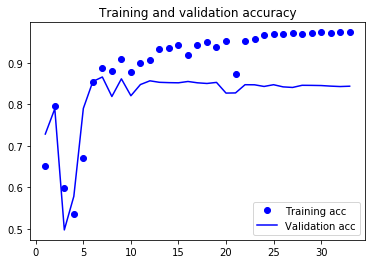

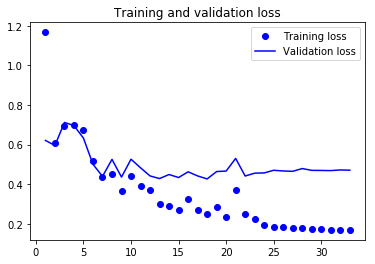

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()